# **Analysing Class Data** #

## *Loading The Data*

*Here we load our data consisting of 5 columns:*

1) **IDs**: Unique college ID of each student.
2) **Hours_Taken**: Total credit hours each student has taken up to senior year.
3) **CGPA**: Cumulative GPA of each student at senior year.
5) **Gender**: Gender of the student, M for male, F for female
6) **Name**: Name of the student.

In [1]:
import pandas as pd
import numpy as np

class_data = pd.read_excel('class_data.xlsx')
class_data.head(10)

,ID,Hours_taken,CGPA,Gender,Name
0,4830,135,3.00,M,Aaron Lawson
1,4831,120,2.70,M,Aaron Lee
2,4832,126,2.17,F,Abigail Peterson
3,4833,130,2.83,F,Alison Black
4,4834,119,2.66,F,Amanda Evans
5,4835,117,1.98,F,Amber Rowe
6,4836,124,2.14,F,Amy Davis
7,4837,135,2.78,F,Andrea Cruz
8,4838,133,3.28,M,Andrew Bowen
9,4839,130,2.64,M,Andrew Hill


### Quick Summary of The Data ###

In [2]:
class_data.drop('ID',axis=1).describe(include='all')

,Hours_taken,CGPA,Gender,Name
count,248.000000,248.000000,248,248
unique,NaN,NaN,2,247
top,NaN,NaN,M,Michael Davis
freq,NaN,NaN,160,2
mean,130.568548,2.973306,NaN,NaN
std,4.676946,0.311792,NaN,NaN
min,115.000000,1.980000,NaN,NaN
25%,130.000000,2.767500,NaN,NaN
50%,133.000000,2.985000,NaN,NaN
75%,133.000000,3.172500,NaN,NaN


## *Analysing CGPA of Students*

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
avg_cgpa = np.mean(class_data.CGPA)
median_cgpa = np.median(class_data.CGPA)

print('Average CGPA: {:.3f}\nCGPA Median: {:.3f}'.format(avg_cgpa , median_cgpa))

Average CGPA: 2.973
CGPA Median: 2.985


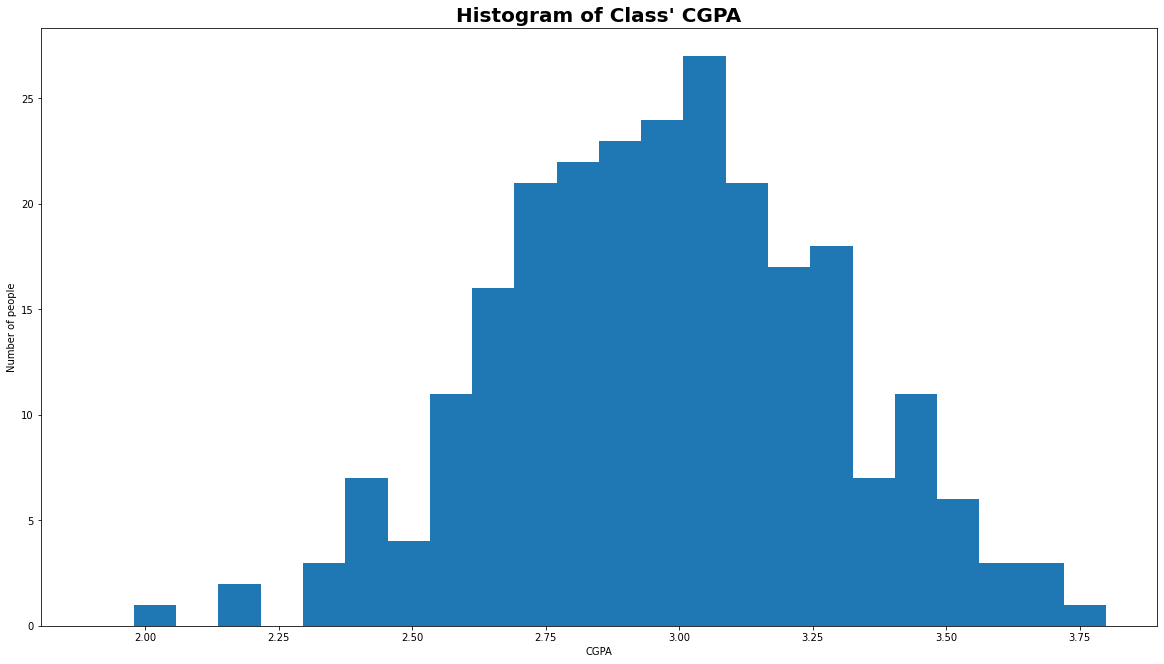

In [5]:
fig = plt.figure(figsize=(20,11))
counts, edges, plot = plt.hist(class_data.CGPA, bins= np.linspace(1.9 , 3.8 , 25))
_ = plt.xlabel('CGPA')
_ = plt.ylabel('Number of people')
_ = plt.title("Histogram of Class' CGPA", fontweight= 'bold', fontsize= 20)

### Number of students in each bin ###

In [6]:
for i , count in enumerate(counts):
    if(count == max(counts)):
        print("{} student(s) got CGPA between {:.2f} and {:.2f}".format(int(count) , edges[i] , edges[i+1]), end=' ')
        print('<- [Most students lie here]')
    else:
        print("{} student(s) got CGPA between {:.2f} and {:.2f}".format(int(count) , edges[i] , edges[i+1]))

0 student(s) got CGPA between 1.90 and 1.98
1 student(s) got CGPA between 1.98 and 2.06
0 student(s) got CGPA between 2.06 and 2.14
2 student(s) got CGPA between 2.14 and 2.22
0 student(s) got CGPA between 2.22 and 2.30
3 student(s) got CGPA between 2.30 and 2.38
7 student(s) got CGPA between 2.38 and 2.45
4 student(s) got CGPA between 2.45 and 2.53
11 student(s) got CGPA between 2.53 and 2.61
16 student(s) got CGPA between 2.61 and 2.69
21 student(s) got CGPA between 2.69 and 2.77
22 student(s) got CGPA between 2.77 and 2.85
23 student(s) got CGPA between 2.85 and 2.93
24 student(s) got CGPA between 2.93 and 3.01
27 student(s) got CGPA between 3.01 and 3.09 <- [Most students lie here]
21 student(s) got CGPA between 3.09 and 3.17
17 student(s) got CGPA between 3.17 and 3.25
18 student(s) got CGPA between 3.25 and 3.32
7 student(s) got CGPA between 3.32 and 3.40
11 student(s) got CGPA between 3.40 and 3.48
6 student(s) got CGPA between 3.48 and 3.56
3 student(s) got CGPA between 3.56 an

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Box Plot of Class' CGPA")

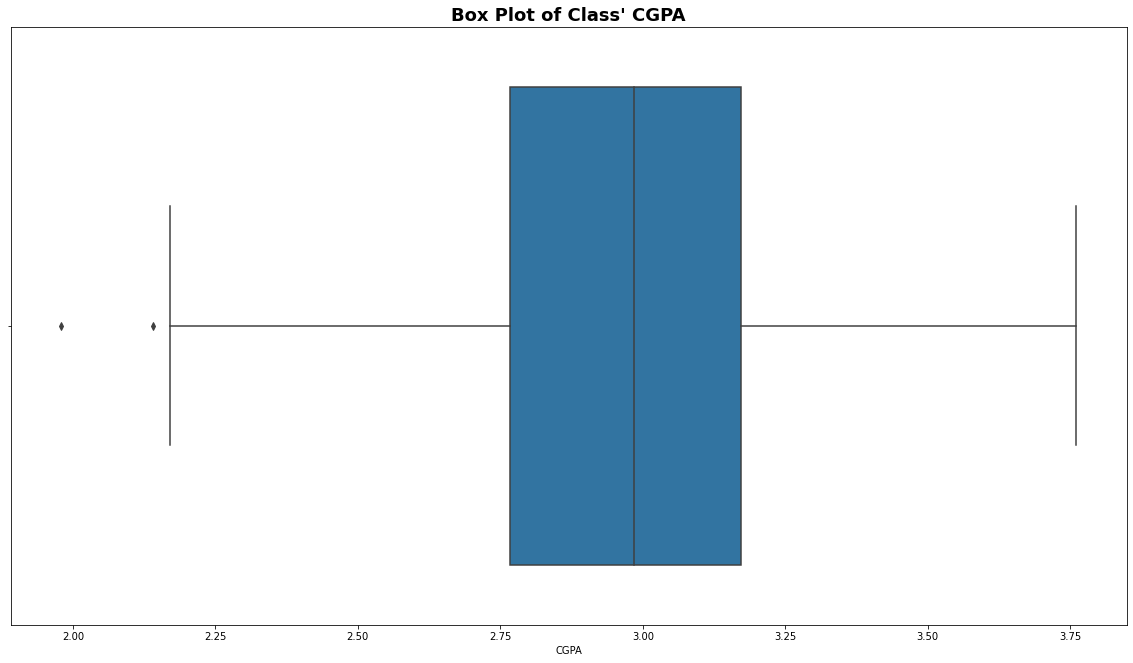

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(20,11))
_ = sns.boxplot(class_data.CGPA)
plt.title("Box Plot of Class' CGPA", fontweight= 'bold', fontsize= 18)

As shown above, we notice that 50% of the students lie between **2.75** to **3.2** CGPA.

## *Number of Students in Each Tier based on Their CGPA*

We have 4 tiers to take into consideration:

1) **Tier 1 (Excellent)** : Students who got a CGPA equal to 3.3 or more
2) **Tier 2 (Very Good)** : Students who got a CGPA between 3.3 and 2.7
3) **Tier 3 (Good)** : Students who got a CGPA between 2.7 and 2.3
4) **Tier 4 (Ok)** : Students who got a CGPA between 2.3 and 1.7

In [8]:
exc = class_data.query('CGPA >= 3.3')
vgood = class_data.query('CGPA >= 2.7 and CGPA < 3.3')
good = class_data.query('CGPA >= 2.3 and CGPA < 2.7')
ok = class_data.query('CGPA >= 1.7 and CGPA < 2.3')

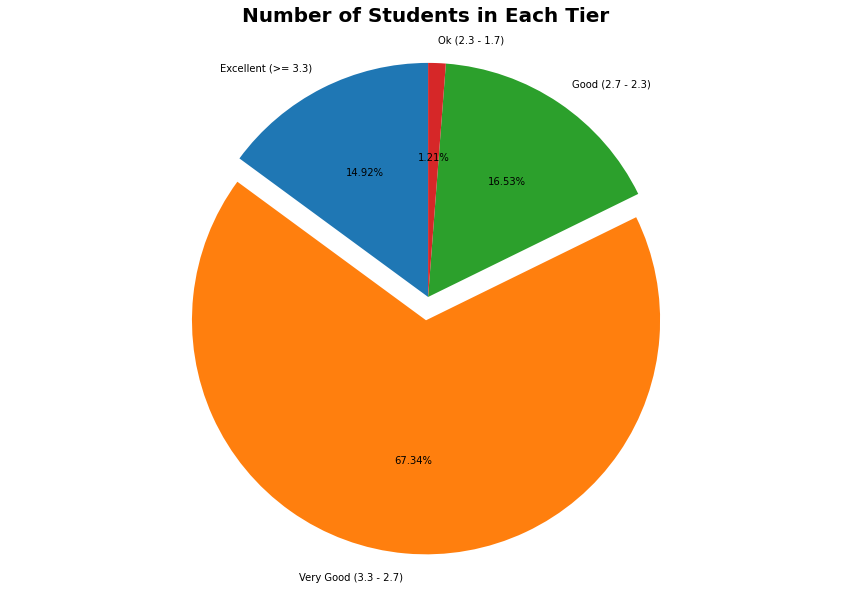

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

data= [len(exc), len(vgood), len(good), len(ok)]
labels = ["Excellent (>= 3.3)" , "Very Good (3.3 - 2.7)" , "Good (2.7 - 2.3)" , "Ok (2.3 - 1.7)"]
explode = [0, 0.1, 0, 0]

_ = ax.pie(data, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90)
_ = plt.title("Number of Students in Each Tier", fontweight= 'bold', fontsize= 20, y=1.02)
_ = ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## *Analysing Number of Credit Hours Registered*

In [10]:
avg_hours_taken = np.mean(class_data.Hours_taken)
median_hours_taken = np.median(class_data.Hours_taken)

print('Average Credit Hours Taken: {:.3f}\nCredit Hours Median: {}'.format(avg_hours_taken , median_hours_taken))

Average Credit Hours Taken: 130.569
Credit Hours Median: 133.0


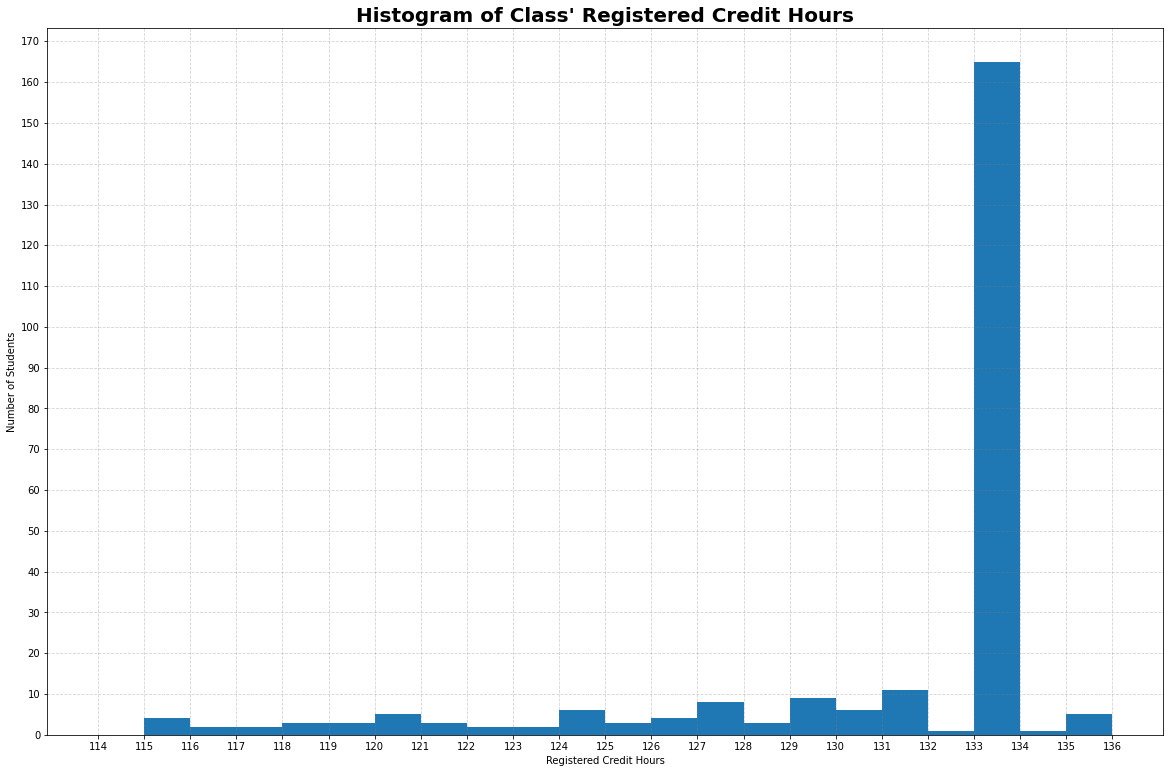

In [46]:
fig = plt.figure(figsize=(20,13))
bins = np.linspace(np.min(class_data.Hours_taken) - 1 , np.max(class_data.Hours_taken) + 1 , 23)
counts, edges, plot= plt.hist(class_data.Hours_taken , bins= bins)
#plt.xticks(bins - 1)
plt.grid(color= 'grey', linestyle='--', alpha=0.35)
plt.yticks(np.linspace(0,170,18))
plt.xticks(np.linspace(114,136,23))
_ = plt.title("Histogram of Class' Registered Credit Hours", fontweight= 'bold', fontsize= 20)
_ = plt.xlabel('Registered Credit Hours')
_ = plt.ylabel('Number of Students')

### Number of students in each bin ###

In [12]:
for i , count in enumerate(counts):
    if(count == max(counts)): print('[Most students lie here]' , end=' ')
    print('{} student(s) registered between {} and {} credit hours'.format(int(count) , int(edges[i]) , int(edges[i+1])))

8 student(s) registered between 114 and 117 credit hours
11 student(s) registered between 117 and 120 credit hours
7 student(s) registered between 120 and 123 credit hours
13 student(s) registered between 123 and 126 credit hours
20 student(s) registered between 126 and 129 credit hours
18 student(s) registered between 129 and 132 credit hours
[Most students lie here] 171 student(s) registered between 132 and 136 credit hours


## *How much is the CGPA affected by the hours taken ?*

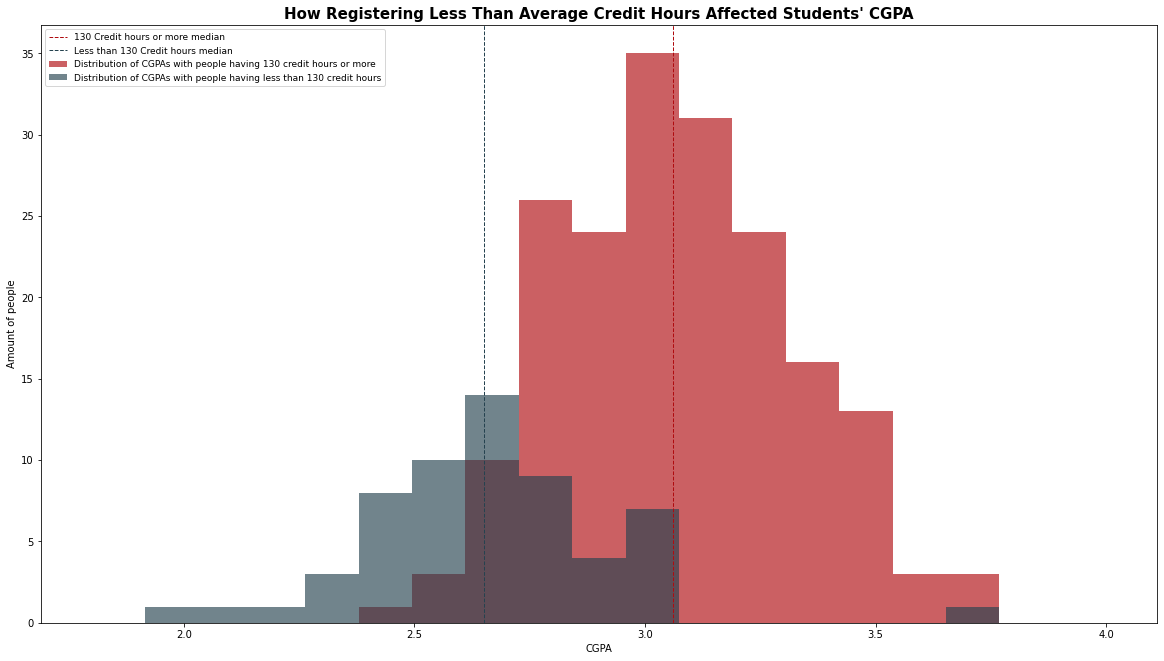

In [13]:
hrs_130 = class_data[class_data.Hours_taken >= 130]
hrs_else = class_data[class_data.Hours_taken < 130]

fig, ax = plt.subplots(figsize=(20,11))

plt.hist(hrs_130.CGPA , label='Distribution of CGPAs with people having 130 credit hours or more' , bins= np.linspace(1.8,4,20), color='#af0b0f', alpha=0.65)
plt.hist(hrs_else.CGPA ,label='Distribution of CGPAs with people having less than 130 credit hours' , bins= np.linspace(1.8,4,20), color='#25424f', alpha=0.65)
plt.axvline(hrs_130.CGPA.median(),label='130 Credit hours or more median', color='#af0b0f', linestyle='dashed', linewidth=1)
plt.axvline(hrs_else.CGPA.median(),label='Less than 130 Credit hours median', color='#25424f', linestyle='dashed', linewidth=1)

plt.xlabel('CGPA')
plt.ylabel('Amount of people')

_ = plt.legend(loc='upper left', prop={'size':9})
_ = plt.title("How Registering Less Than Average Credit Hours Affected Students' CGPA", fontweight= 'bold', fontsize= 15)

Here we notice that students who registered less than average (130) credit hours have a lower average CGPA than students who registed 130 credit hours or more. We also notice one outlier who registered less than average credit hours, yet scored an excellent CGPA.
*This might have happened due to many reasons that require more data to investigate*

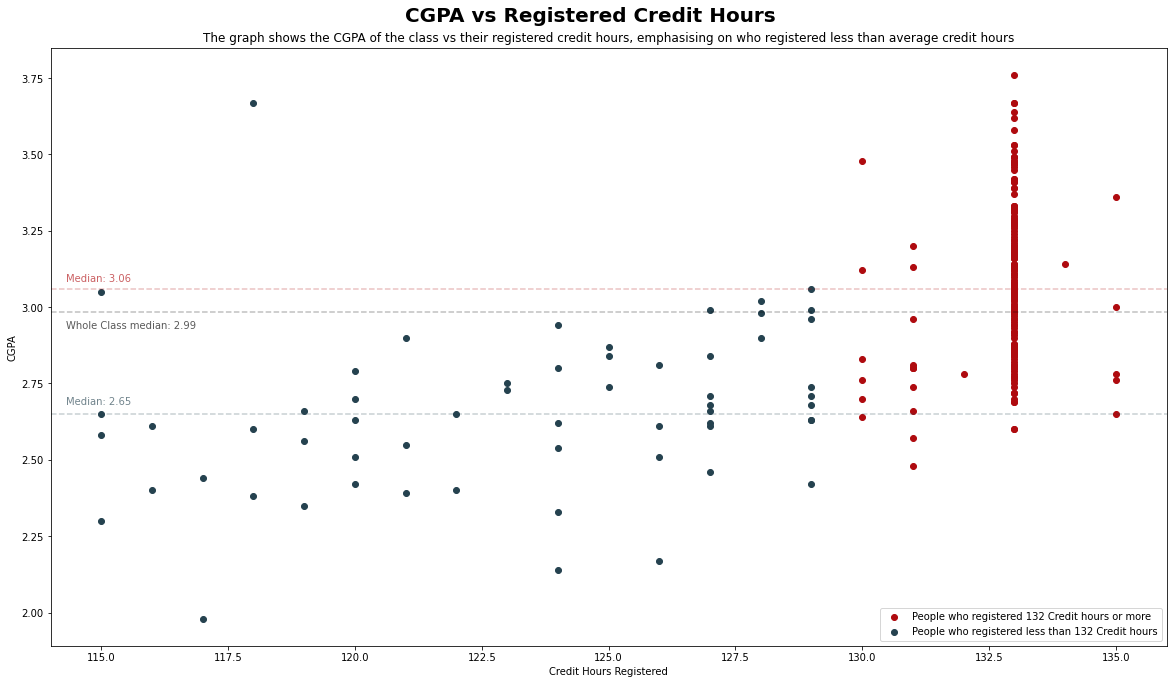

In [14]:
fig , ax = plt.subplots(figsize=(20,11))
plt.scatter(x=hrs_130.Hours_taken , y=hrs_130.CGPA , c='#af0b0f', label='People who registered 132 Credit hours or more')
plt.scatter(x=hrs_else.Hours_taken , y=hrs_else.CGPA , c='#25424f', label='People who registered less than 132 Credit hours')

plt.axhline(hrs_130.CGPA.median() , color='#af0b0f' , linestyle='dashed', alpha=0.25)
plt.text(114.3, 3.085, 'Median: {:.2f}'.format(hrs_130.CGPA.median()), color='#af0b0f', alpha=0.65)
plt.axhline(hrs_else.CGPA.median(), color='#25424f' , linestyle='dashed', alpha=0.25)
plt.text(114.3, 2.68, 'Median: {:.2f}'.format(hrs_else.CGPA.median()), color='#25424f', alpha=0.65)
plt.axhline(class_data.CGPA.median(), color='black' , linestyle='dashed', alpha=0.25)
plt.text(114.3, 2.93, 'Whole Class median: {:.2f}'.format(class_data.CGPA.median()), color='black', alpha=0.65)

plt.legend(loc='lower right')

_ = plt.xlabel('Credit Hours Registered')
_ = plt.ylabel('CGPA')
_ = plt.suptitle("CGPA vs Registered Credit Hours", fontweight= 'bold', fontsize= 20, y= 0.932)
_= plt.title('The graph shows the CGPA of the class vs their registered credit hours, emphasising on who registered less than average credit hours')

## *Analysing Male Students vs Female Students*

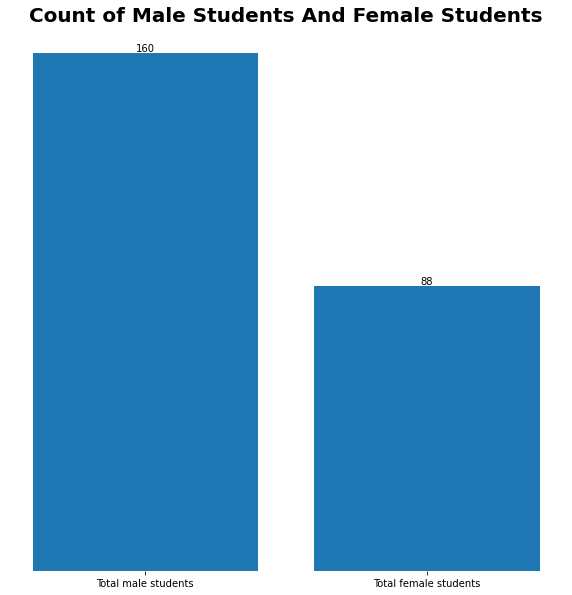

In [15]:
male_students = class_data[class_data.Gender == 'M']
female_students = class_data[class_data.Gender == 'F']

data = [len(male_students), len(female_students)]
labels= ['Total male students', 'Total female students']
fig, ax = plt.subplots(figsize=(10,10))

for s in ['top', 'bottom' , 'left' , 'right']:
    ax.spines[s].set_visible(False)

plt.yticks([])

bars = plt.bar(labels, data)
_ = plt.bar_label(bars)
_ = plt.title("Count of Male Students And Female Students", fontweight= 'bold', fontsize= 20)

In [16]:
print('Male Student Summary')
print(male_students.drop('ID',axis=1).describe())
print('\nFemale Student Summary')
print(female_students.drop('ID',axis=1).describe())

Male Student Summary
       Hours_taken        CGPA
count   160.000000  160.000000
mean    130.662500    2.986750
std       4.630888    0.293265
min     115.000000    2.300000
25%     130.000000    2.787500
50%     133.000000    3.000000
75%     133.000000    3.172500
max     135.000000    3.670000

Female Student Summary
       Hours_taken       CGPA
count    88.000000  88.000000
mean    130.397727   2.948864
std       4.781525   0.343339
min     116.000000   1.980000
25%     129.000000   2.740000
50%     133.000000   2.935000
75%     133.000000   3.175000
max     135.000000   3.760000


### Male students' CGPA vs Female students' CGPA ###

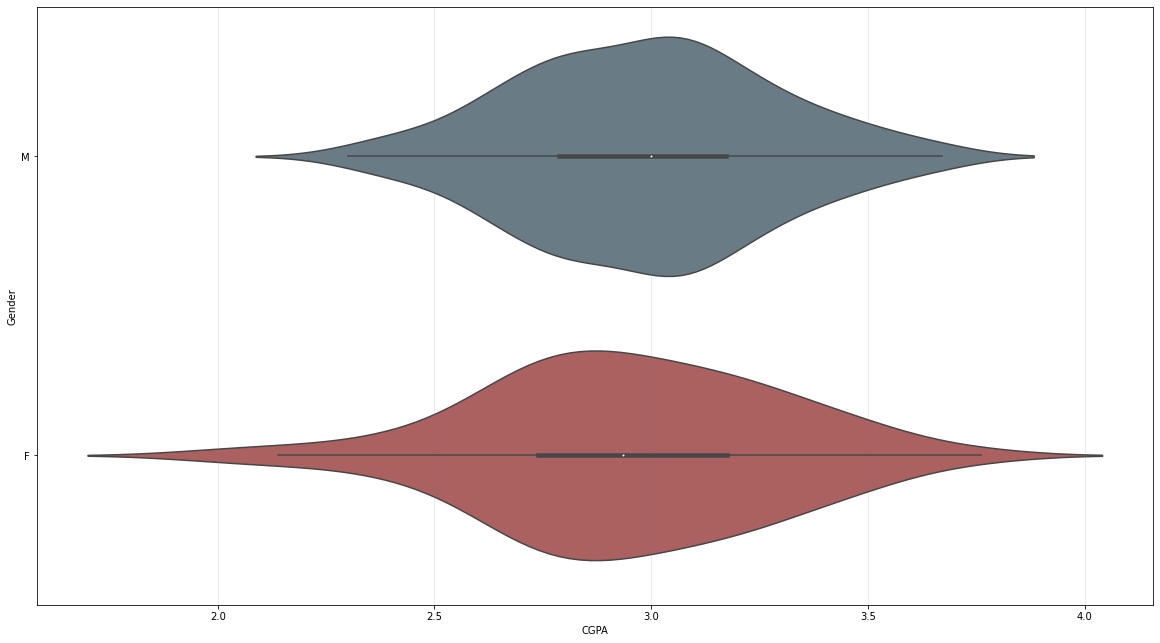

In [17]:
fig = plt.figure(figsize=(20,11))

sns.violinplot(data=class_data, x='CGPA', y='Gender',palette=['#647e8a', '#b95454'])
plt.grid(visible=True, axis='x', color='grey', alpha=0.2)


Here we notice that the female students have more range than the male students.

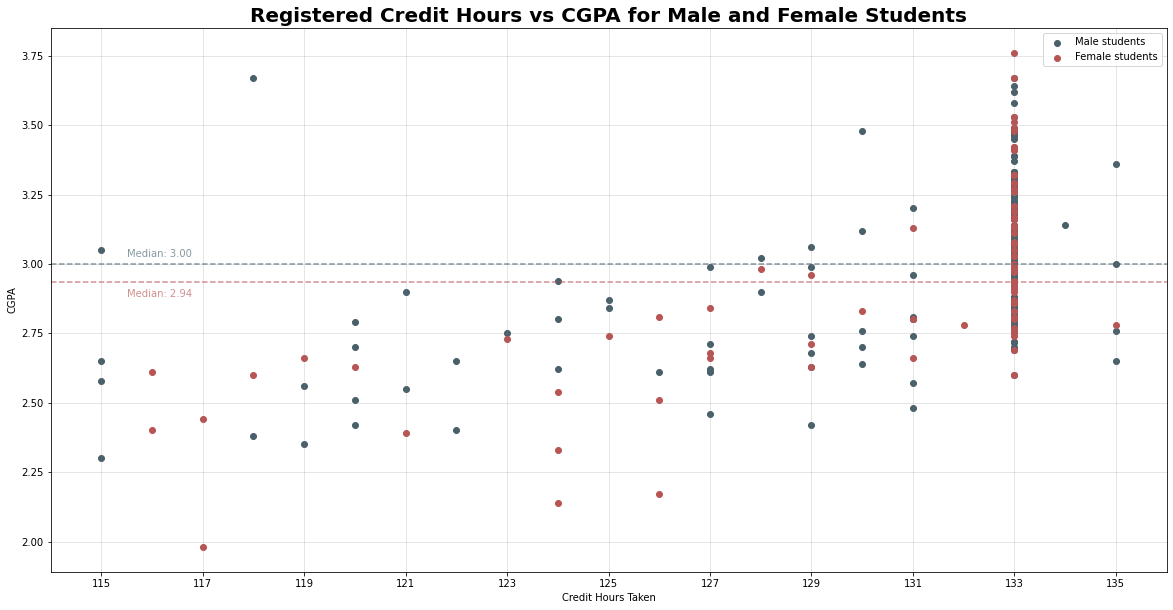

In [18]:
fig = plt.figure(figsize=(20,10))
plt.scatter(male_students.Hours_taken, male_students.CGPA, color='#49606b', label='Male students')
plt.scatter(female_students.Hours_taken, female_students.CGPA, color='#b95454', label='Female students')

plt.title('Registered Credit Hours vs CGPA for Male and Female Students', fontweight= 'bold', fontsize= 20)
plt.xlabel('Credit Hours Taken')
plt.xticks(np.linspace(115,135,11))
plt.ylabel('CGPA')

plt.grid(visible=True, color='grey', alpha=0.25)

plt.axhline(male_students.CGPA.median(), color='#49606b', linestyle='dashed', alpha=0.65)
plt.text(115.5, 3.025, 'Median: {:.2f}'.format(male_students.CGPA.median()), color='#49606b', alpha=0.65)
plt.axhline(female_students.CGPA.median(), color='#b95454', linestyle='dashed', alpha=0.65)
plt.text(115.5, 2.88, 'Median: {:.2f}'.format(female_students.CGPA.median()), color='#b95454', alpha=0.65)

plt.legend()

### Genders in different Tiers

In [19]:
def apply_tier(row):
    if(row.CGPA >= 3.3): row['Tier'] = 'Tier 1'
    elif((row.CGPA >= 2.7) & (row.CGPA < 3.3)): row['Tier'] = 'Tier 2'
    elif((row.CGPA >= 2.3) & (row.CGPA < 2.7)): row['Tier'] = 'Tier 3'
    else: row['Tier'] = 'Tier 4'
    return row['Tier']

class_data['Tier'] = class_data.apply(lambda x: apply_tier(x) , axis= 1)
class_data.sample(10)

,ID,Hours_taken,CGPA,Gender,Name,Tier
132,4962,133,2.72,M,John Reid,Tier 2
92,4922,133,3.05,M,Erik White,Tier 2
89,4919,126,2.81,F,Emily Davis,Tier 2
91,4921,120,2.42,M,Eric Vazquez,Tier 3
246,5076,135,2.65,M,Travis Medina,Tier 3
217,5047,127,2.66,F,Sandy Barnes,Tier 3
180,5010,133,3.27,F,Monica Geller,Tier 2
169,4999,133,2.92,F,Melanie Campbell,Tier 2
190,5020,133,3.67,F,Norma Townsend,Tier 1
177,5007,133,2.77,F,Michelle Miller,Tier 2


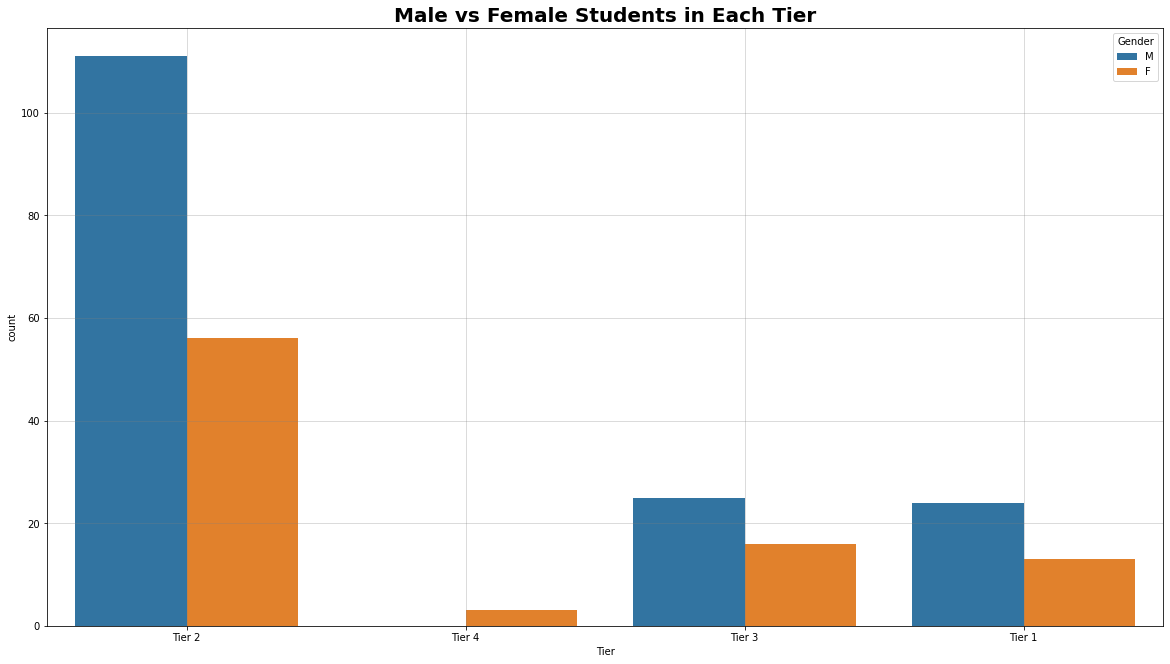

In [20]:
fig , ax = plt.subplots(figsize = (20,11))
bars = sns.countplot(data= class_data, x='Tier', hue='Gender')
plt.grid(visible=True , color='grey', alpha=0.35)
_ = plt.title("Male vs Female Students in Each Tier", fontweight= 'bold', fontsize= 20)

### Gender differenes in credit hours

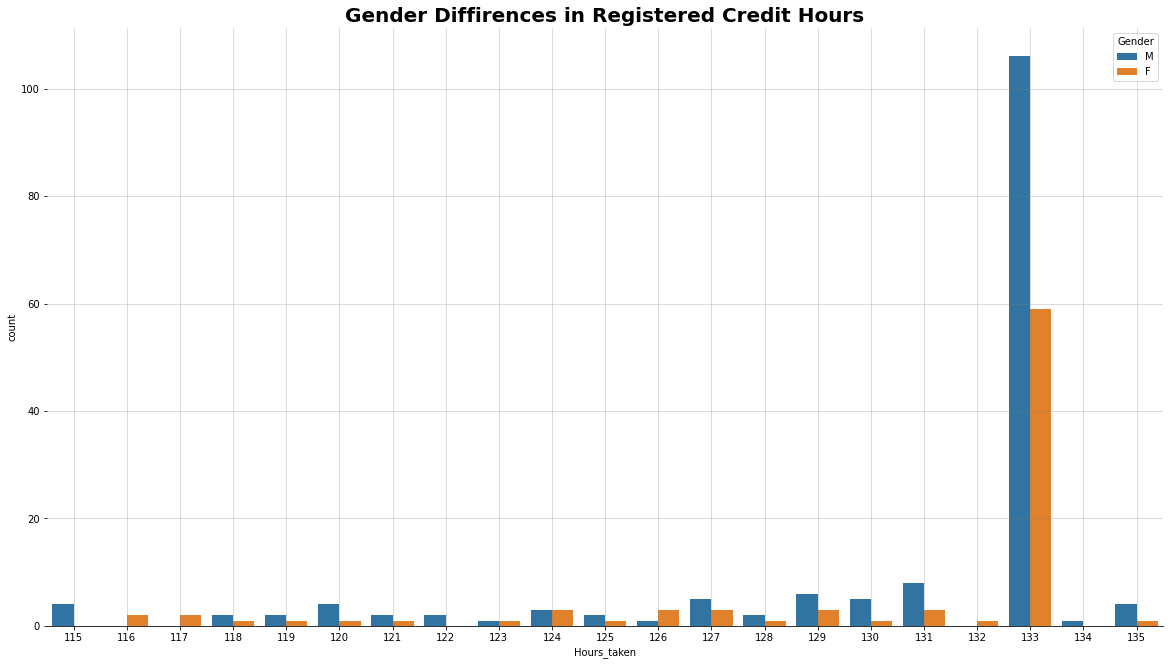

In [21]:
fig , ax = plt.subplots(figsize = (20,11))

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

sns.countplot(data= class_data, x='Hours_taken', hue='Gender')
plt.grid(visible=True , color='grey', alpha=0.35)
_ = plt.title("Gender Diffirences in Registered Credit Hours", fontweight= 'bold', fontsize= 20)

# **Finding a student's CGPA & registered credit hours**

In [22]:
CGPAs = pd.Series(np.linspace(1,107,107).astype(int) ,index= class_data.CGPA.unique())      #Make a pd.series with all the unique values of CPGA
total_students = len(class_data)

In [23]:
student_id = int(input("Enter the student ID (Starting with 4830): "))
if student_id in class_data.ID.to_list():
    student = class_data.loc[class_data.ID == student_id,:]     #We locate the student with the desired ID
    student_rank = CGPAs.loc[student.CGPA]
    student_name = class_data.loc[class_data.ID == int(student.ID.to_string(index=False))].Name
    print("""
    Student Name: {}
    Student ID: {}
    CGPA: {} ranked {} out of 106 among other CGPAs.
    Has the rank of {} out of 248 among the class.
    Registered {} credit hours.
    Top {:.3f}%
    """.format(student_name.to_string(index=False),
            student.ID.to_string(index=False),
            student.CGPA.to_string(index=False),
            student_rank.to_string(index=False),
            int(student.index.values)+1,
            student.Hours_taken.to_string(index=False),
            ((int(student.index.values)+1)/total_students)*100) )
else:
    print("Can't find a student with this ID!")

Can't find a student with this ID!
